<a href="https://colab.research.google.com/github/praseedm/tracin_implemention_on_ledgar_dataset/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q

     |████████████████████████████████| 325 kB 7.7 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 136 kB 53.2 MB/s 
     |████████████████████████████████| 212 kB 62.9 MB/s 
     |████████████████████████████████| 1.1 MB 22.5 MB/s 
     |████████████████████████████████| 127 kB 29.6 MB/s 
     |████████████████████████████████| 144 kB 47.7 MB/s 
     |████████████████████████████████| 271 kB 55.3 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
from datasets import load_dataset

In [3]:
ledgar_dataset = load_dataset("lex_glue", 'ledgar')

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset lex_glue downloaded and prepared to /root/.cache/huggingface/datasets/lex_glue/ledgar/1.0.0/c3c0bd7433b636dc39ae49a84dc401190c73156617efc415b04e9835a93a7043. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
type(ledgar_dataset)

datasets.dataset_dict.DatasetDict

[DatasetDict documentation](https://huggingface.co/docs/datasets/v2.1.0/en/package_reference/main_classes#datasets.DatasetDict)

In [5]:
ledgar_dataset.keys()

dict_keys(['train', 'test', 'validation'])

In [6]:
type(ledgar_dataset['test'])

datasets.arrow_dataset.Dataset

[Dataset deocumentation](https://huggingface.co/docs/datasets/v2.1.0/en/package_reference/main_classes#datasets.Dataset)

In [7]:
ledgar_dataset.num_columns

{'test': 2, 'train': 2, 'validation': 2}

In [8]:
ledgar_dataset.num_rows

{'test': 10000, 'train': 60000, 'validation': 10000}

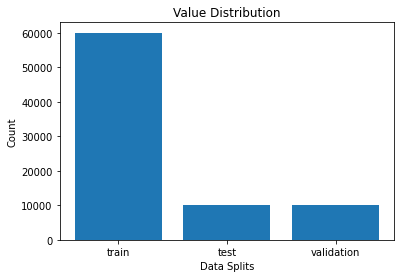

In [9]:
import matplotlib.pyplot as plt

D = ledgar_dataset.num_rows
plt.bar(D.keys(), D.values())
plt.title('Value Distribution')
plt.xlabel('Data Splits')
plt.ylabel('Count')
plt.show()

Dataset consist of 80000 rows.

Out of which 60000 (75%) belongs to train.

The rest is equally divided between test and validation.

So 10000 (12.5%) each test and validation.

In [10]:
def print_unique_labels():
  unique_label_dict = ledgar_dataset.unique('label')
  for key, value in unique_label_dict.items():
    print(f"{len(value)} Number of unique labels in {key}")

In [11]:
print_unique_labels()

100 Number of unique labels in train
100 Number of unique labels in test
99 Number of unique labels in validation


As can be seen there are 100 unique labels for train and test and 99 for validation.

But how many representations each label has?

So lets find out data distribution by labels.

## Check label vise distribution in Train data

In [12]:
import pandas as pd

In [13]:
train_df = pd.DataFrame(ledgar_dataset['train'])

In [14]:
train_df.shape

(60000, 2)

In [15]:
train_df.head(3)

,text,label
0,Except as otherwise set forth in this Debentur...,97
1,No ERISA Event has occurred or is reasonably e...,39
2,This Amendment may be executed by one or more ...,26


In [16]:
label_value_counts = train_df['label'].value_counts()
label_value_counts_df = pd.DataFrame({'label':label_value_counts.index, 'value_count':label_value_counts.values})
label_value_counts_df.head(3)

,label,value_count
0,47,3167
1,65,2493
2,26,2427


In [17]:
label_value_counts_df['value_count'].describe()

count     100.000000
mean      600.000000
std       538.173811
min        23.000000
25%       311.750000
50%       426.500000
75%       667.250000
max      3167.000000
Name: value_count, dtype: float64

In [30]:
(label_value_counts_df['value_count'] > 667).sum()

25

In [33]:
filtered_labels = label_value_counts_df[label_value_counts_df['value_count'] > 667]['label']

In [20]:
filtered_train_df = train_df[train_df['label'].isin(filtered_labels)]
filtered_train_df.shape

(32906, 2)

### Filtering Test and validation dataset to match train labels

In [21]:
test_df = pd.DataFrame(ledgar_dataset['test'])
print(f"Test df shape : {test_df.shape}")
validation_df = pd.DataFrame(ledgar_dataset['validation'])
print(f"Validation df shape : {validation_df.shape}")

Test df shape : (10000, 2)
Validation df shape : (10000, 2)


In [22]:
filtered_test_df = test_df[test_df['label'].isin(filtered_labels)]
filtered_test_df.shape

(5438, 2)

In [23]:
filtered_validation_df = validation_df[validation_df['label'].isin(filtered_labels)]
filtered_validation_df.shape

(5465, 2)

In [24]:

filtered_data_value_dist_dict = {'Original' : [train_df.shape[0], validation_df.shape[0], test_df.shape[0]],
                                 "Filtered" : [filtered_train_df.shape[0], filtered_validation_df.shape[0], filtered_test_df.shape[0]]}
filtered_data_value_dist_df = pd.DataFrame(filtered_data_value_dist_dict, index=["Train", "Validation", "Test"])
filtered_data_value_dist_df

,Original,Filtered
Train,60000,32906
Validation,10000,5465
Test,10000,5438


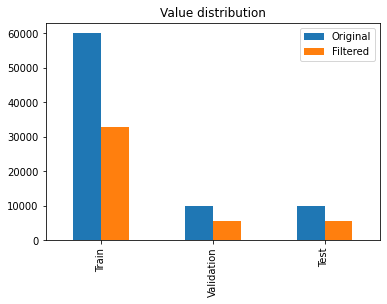

In [25]:
filtered_data_value_dist_df.plot(kind='bar', title="Value distribution")

## Sequence length

In [26]:
filtered_train_df['text'].apply(lambda val : len(val.split())).describe()

count    32906.000000
mean       108.875767
std         93.267151
min          3.000000
25%         47.000000
50%         80.000000
75%        138.000000
max       1167.000000
Name: text, dtype: float64

In [34]:
filtered_labels = sorted(filtered_labels.values.tolist())
print(filtered_labels)

[2, 7, 19, 20, 26, 38, 41, 43, 45, 46, 47, 49, 51, 58, 61, 65, 68, 79, 85, 87, 88, 89, 92, 96, 97]


In [36]:
filtered_train_df['label'] = filtered_train_df['label'].apply(lambda val : filtered_labels.index(val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
filtered_test_df['label'] = filtered_test_df['label'].apply(lambda val : filtered_labels.index(val))
filtered_validation_df['label'] = filtered_validation_df['label'].apply(lambda val : filtered_labels.index(val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Saving filtered data into CSVs

In [39]:
def save_df_to_csv(df, path):
  df.to_csv(path, index=None)

In [40]:
save_df_to_csv(filtered_train_df,"./data/train_data.csv")

In [41]:
save_df_to_csv(filtered_test_df,"./data/test_data.csv")

In [42]:
save_df_to_csv(filtered_validation_df,"./data/validation_data.csv")

In [43]:
labels = ledgar_dataset['train'].info.features['label'].names

In [48]:
map_label_index_to_name = { index:name for index, name in enumerate(labels) }

In [45]:
import json

In [49]:
with open('./data/label_index_to_name.json', 'w') as write_stream:
  json.dump(map_label_index_to_name, write_stream)

In [46]:
with open('./data/filtered_label_indices.json', 'w') as write_stream:
  json.dump(filtered_labels, write_stream)

In [50]:
filtered_label_names = [map_label_index_to_name[index] for index in filtered_labels]
print(filtered_label_names)

['Amendments', 'Assignments', 'Compliance With Laws', 'Confidentiality', 'Counterparts', 'Entire Agreements', 'Expenses', 'Financial Statements', 'Further Assurances', 'General', 'Governing Laws', 'Indemnifications', 'Insurances', 'Litigations', 'No Conflicts', 'Notices', 'Payments', 'Severability', 'Survival', 'Taxes', 'Terminations', 'Terms', 'Use Of Proceeds', 'Waiver Of Jury Trials', 'Waivers']


In [51]:
with open('./data/label_names.json', 'w') as write_stream:
  json.dump(filtered_label_names, write_stream)

In [52]:
!zip -r data.zip ./data

  adding: data/ (stored 0%)
  adding: data/label_names.json (deflated 45%)
  adding: data/filtered_label_indices.json (deflated 35%)
  adding: data/test_data.csv (deflated 73%)
  adding: data/train_data.csv (deflated 73%)
  adding: data/label_index_to_name.json (deflated 58%)
  adding: data/validation_data.csv (deflated 73%)
